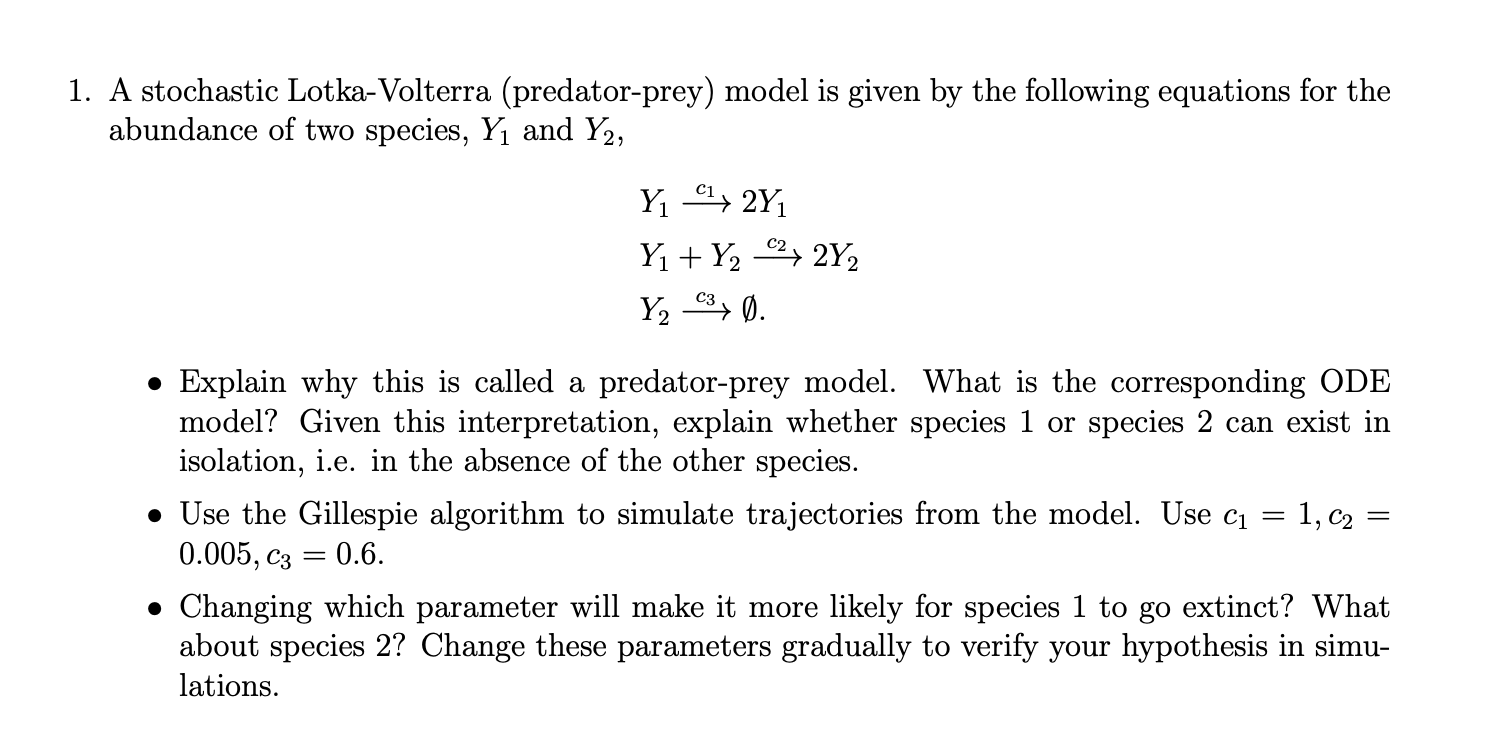 

Gillespie algorithm for simulating the trajectories:

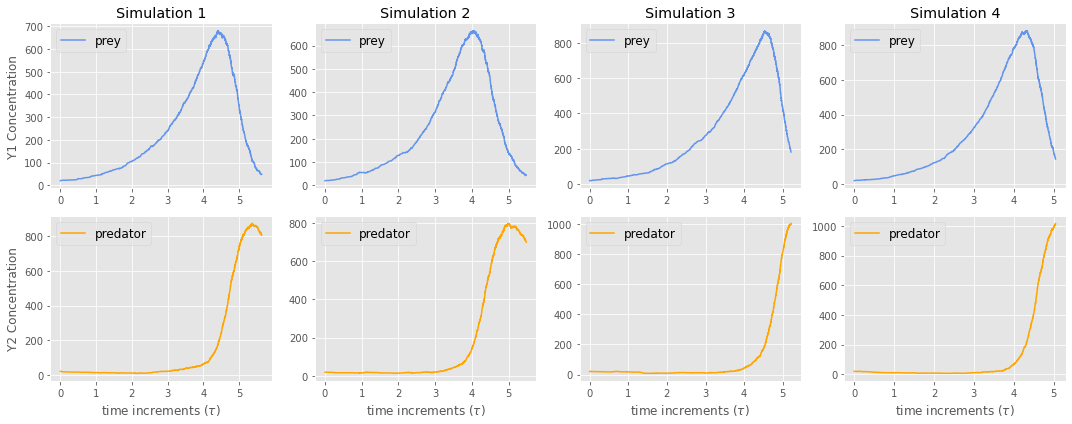

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def Gillespie_Lotka_Volterra(X0, Y0, c1, c2, c3, n_steps, n_sim):
    
    #n_sim = number of simulations
    X, Y, t = [np.zeros((n_sim, n_steps)) for i in range(3)]
    for i in range(n_sim):
        
        X[i,0], Y[i,0] = X0, Y0
        
        for k in range(n_steps-1):

            prop = [a1,a2,a3] = [c1*X[i,k], c2*X[i,k]*Y[i,k], c3*Y[i,k]]    # propensity functions
            v = [[1,0], [-1,1], [0,-1]]    #  reaction vectors
            par = [sum(prop[:j]) for j in range(1,4)]    # partial sums of propensities
            
            if sum(prop) > 0:
                
                u1 = np.random.uniform(0,1)
                u2 = np.random.uniform(0,1)

                j = next(i for i, val in enumerate(par) if val > u1*sum(prop))
                tau = -np.log(u2)/sum(prop)

                t[i,k+1] = t[i,k] + tau
                X[i,k+1] = X[i,k] + v[j][0]
                Y[i,k+1] = Y[i,k] + v[j][1]
                
            else:   
                
                t[i,k+1] = t[i,k]+0.0001
                X[i,k+1] = X[i,k] 
                Y[i,k+1] = Y[i,k]
                
        
    return [X, Y, t]     
        
          
def plots(X0, Y0, c1, c2, c3, n_steps, n_sim):
    
    fig, ax = plt.subplots(2,n_sim, figsize=(15,6))
    
    [X, Y, t] = Gillespie_Lotka_Volterra(X0, Y0, c1, c2, c3, n_steps, n_sim)
    
    for i in range(n_sim):
        
        ax[0,i].plot(t[i,:], X[i,:], label='1', color='cornflowerblue',alpha=1)
        ax[1,i].plot(t[i,:], Y[i,:], label='2', color='orange',alpha=1)
        ax[0,i].set_title('Simulation %i'%(i+1))
        ax[0,i].legend(['prey'], fontsize=12)
        ax[1,i].legend(['predator'], fontsize=12)
        ax[1,i].set_xlabel(r'time increments ($\tau$)')
        ax[0,0].set_ylabel('Y1 Concentration')
        ax[1,0].set_ylabel('Y2 Concentration')
        plt.tight_layout()
        

X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,0.6]
n_steps = 3200
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)        

As we can see from the plots when the predator population size is very small, the prey population grows fast until it reaches a maximum after which it starts declining because the predator concentration has become large enough (becuase of abundance in foods after prey population has increased) to decrease the prey population. Then the predator population declines as the predator runs out of foods.

Next plots show the behavior for a larger time horizon.

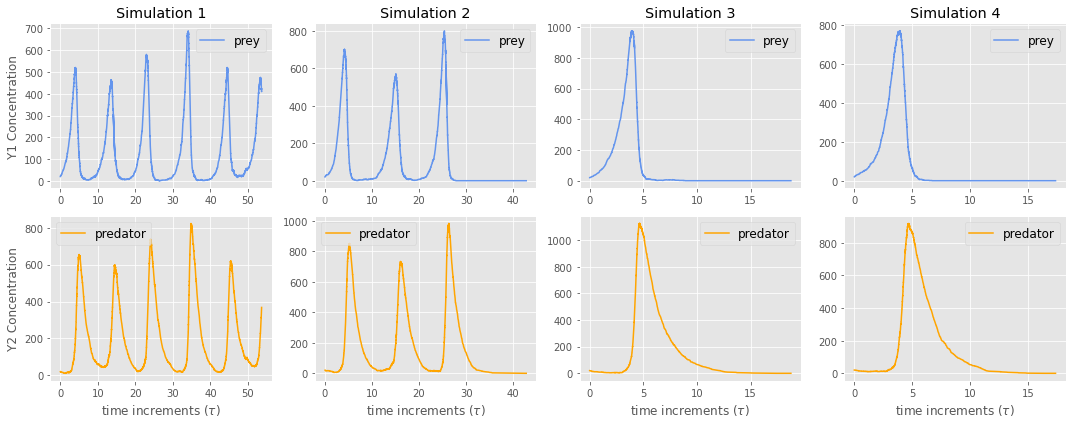

In [3]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,0.6]
n_steps = 20000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)   

We expect that if we increase $c_2$ then $Y_1$ goes extinct more likely, because the rate of preying increases. 
We can see this from the next plots. I have changed $c_2=1$ but other parameters have remained unchanged. we can see that the prey, $Y1$, goes extinct very quickly.

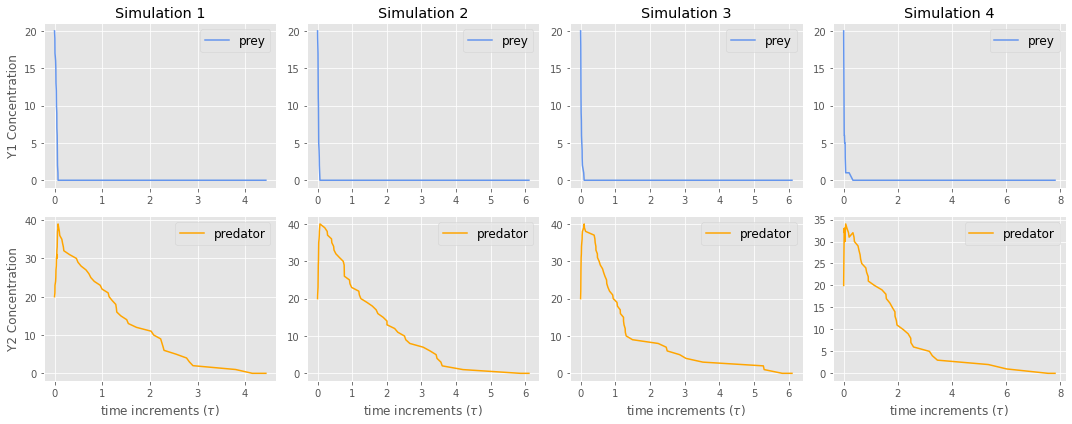

In [10]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,1,0.6]
n_steps = 3000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim)  

Moreover if we decrease $c_2$, then $Y_2$ goes extinct more likely as the rate of birth for $Y_2$ decreases. We can see this from next plots. I have decreased $c_2$ to $0.0001$ with other parameters remained unchanged.

In $3$ out of $4$ simulations, $Y_2$ has gone extinct.

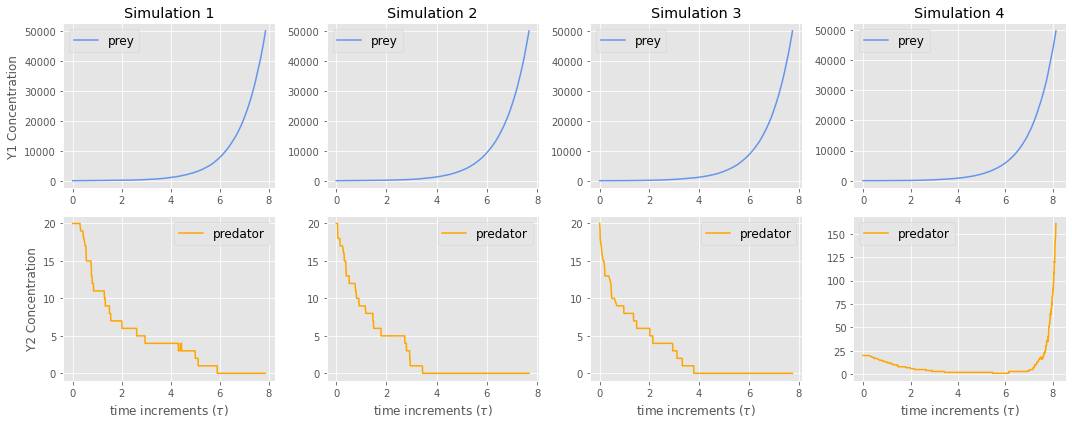

In [13]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.0001,0.6]
n_steps = 50000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim) 

Finally if we increase $c_3$, we expect $Y_2$ go extinct more likely because the rate of death for $Y_2$ increases. 

I have chosen $c_3=1$ with other parameters remained unchanged. As we can see agian, in 3 out 4 simulationss, $Y_2$ has gone extinct.

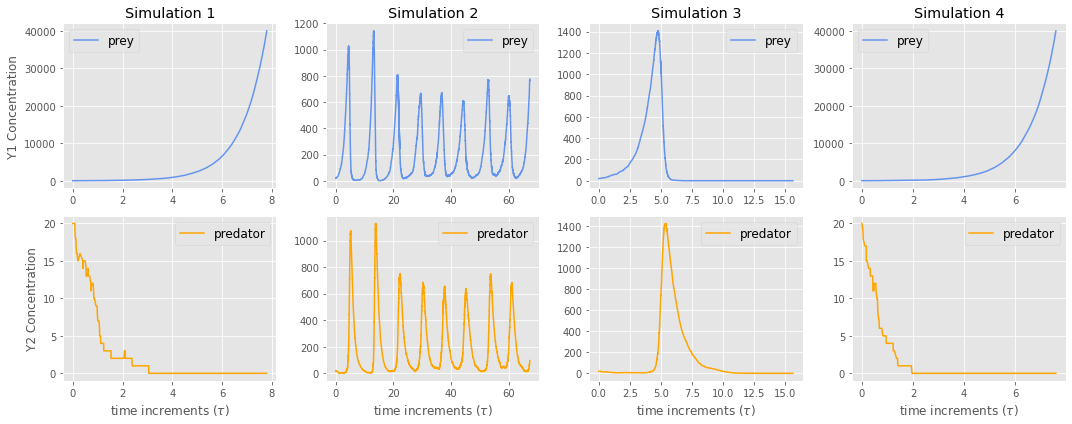

In [14]:
X0, Y0 = 20, 20
[c1, c2, c3] = [1,0.005,1]
n_steps = 40000
n_sim = 4
plots(X0, Y0, c1, c2, c3, n_steps, n_sim) 

Question #2: 
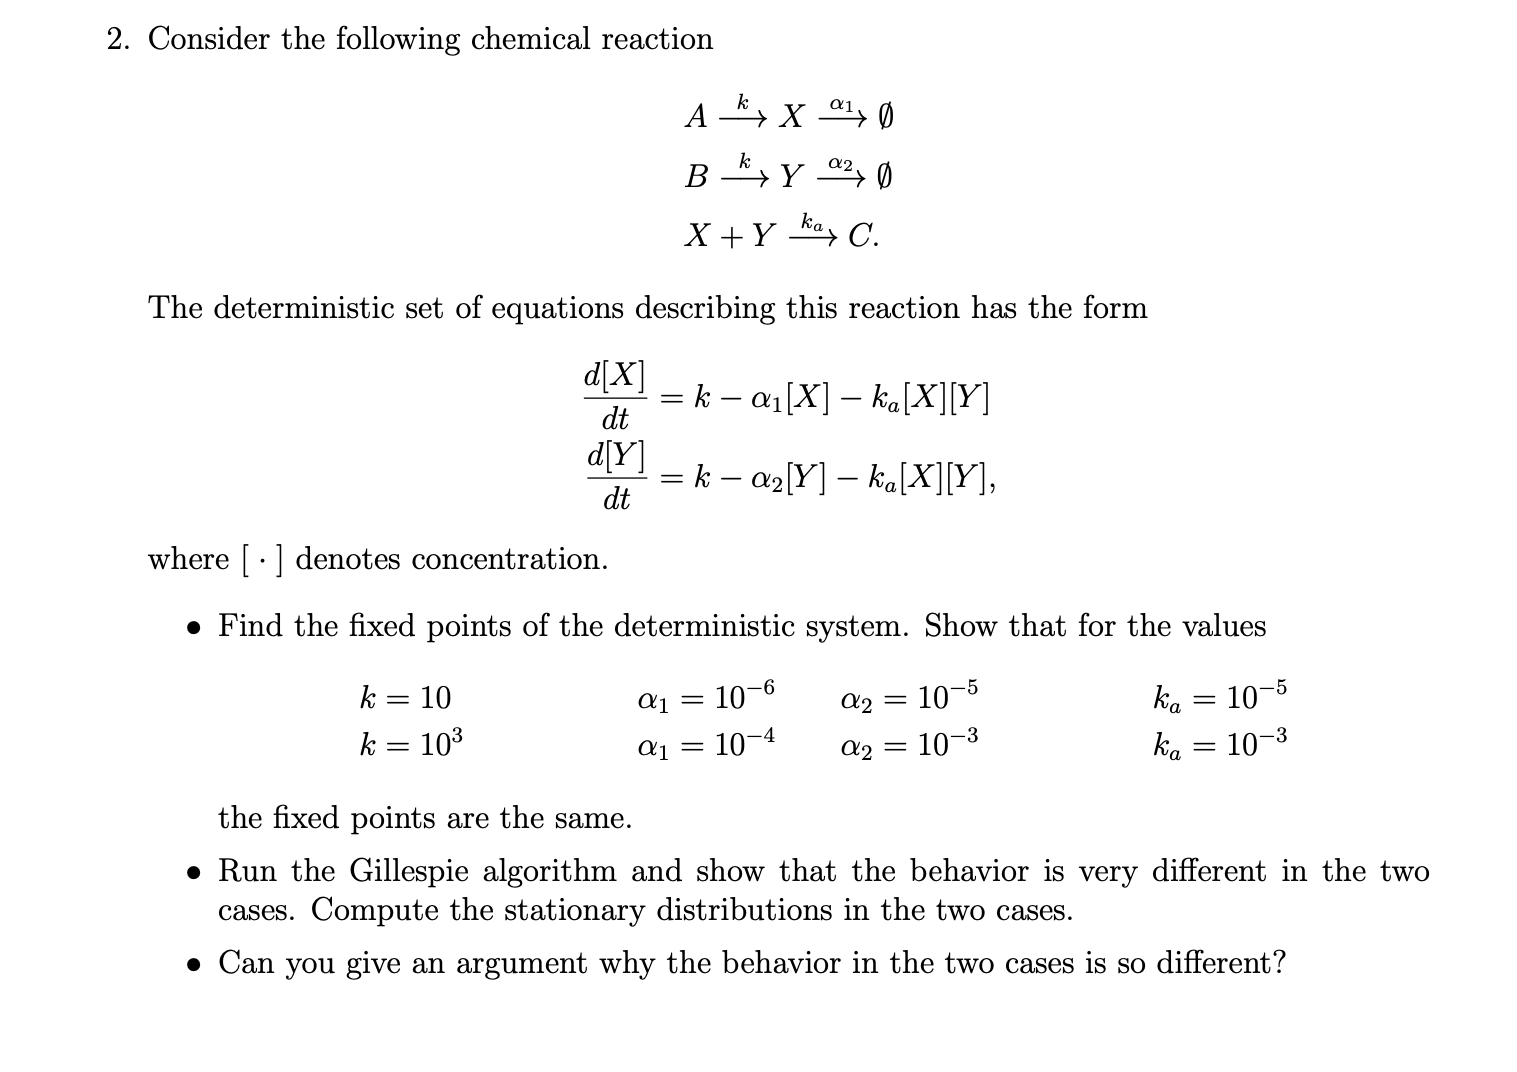

Fixed points are $X\approx3161.78$ and $Y\approx316.178$.

Gillespie algorithm for simulating the trajectories using the first set of parameters:


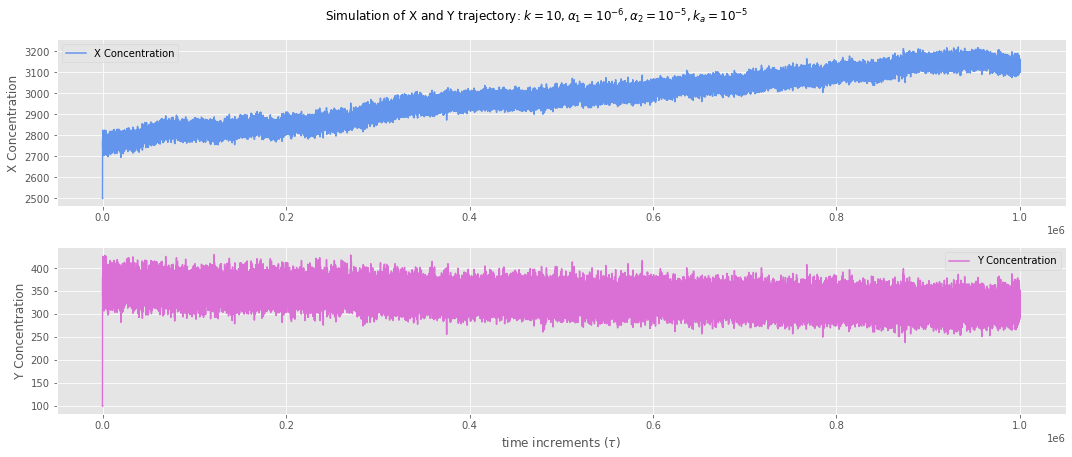

In [17]:
def Gillespie_2(X0, Y0, K, a1, a2, ka, n_steps, n_sim):
    
    # n_sim = number of simulations
    
    X, Y, t = [np.zeros((n_sim, n_steps)) for i in range(3)]
    for i in range(n_sim):
        
        X[i,0], Y[i,0] = X0, Y0
        
        for k in range(n_steps-1):

            prop = [K, ka*X[i,k]*Y[i,k], a1*X[i,k], a2*Y[i,k]]    # propensity functions
            v = [[1,1], [-1,-1], [-1,0], [0,-1]]    # reaction vectors
            par = [sum(prop[:j]) for j in range(1,5)]    # partial sums of propensities
             
            u1 = np.random.uniform(0,1)
            u2 = np.random.uniform(0,1)

            j = next(i for i, val in enumerate(par) if val > u1*sum(prop)) 
            tau = -np.log(u2)/sum(prop)

            t[i,k+1] = t[i,k] + tau
            X[i,k+1] = X[i,k] + v[j][0]
            Y[i,k+1] = Y[i,k] + v[j][1]

                
    X_aver = np.mean(X, axis=0)  
    Y_aver = np.mean(Y, axis=0)
    t_aver = np.mean(t, axis=0)
        
    return [X, Y, t, X_aver, Y_aver, t_aver]     
        
        
def plots2(X0, Y0, K, a1, a2, ka, n_steps, n_sim):
    
    fig, ax = plt.subplots(2,1, figsize=(15,6))
    
    [X, Y, t, Xmean, Ymean, tmean] = Gillespie_2( X0, Y0, K, a1, a2, ka, n_steps, n_sim)
      
    ax[0].plot(t[0,:], X[0,:], label='1', color='cornflowerblue',alpha=1)
    ax[1].plot(t[0,:], Y[0,:], label='2', color='orchid',alpha=1)
    ax[0].legend(['X Concentration'])
    ax[1].legend(['Y Concentration'])
    ax[1].set_xlabel(r'time increments ($\tau$)')
    ax[0].set_ylabel('X Concentration')
    ax[1].set_ylabel('Y Concentration')
    plt.suptitle(r'Simulation of X and Y trajectory: $k=10,\alpha_1=10^{-6}'\
                 r',\alpha_2=10^{-5},k_a=10^{-5}$', y=1.05)
    plt.tight_layout()


X0, Y0 = 2500, 100
[K, a1, a2, ka] = [10,10**-6,10**-5,10**-5]
n_steps = 2*10**7
n_sim = 1
plots2(X0, Y0, K, a1, a2, ka, n_steps, n_sim)

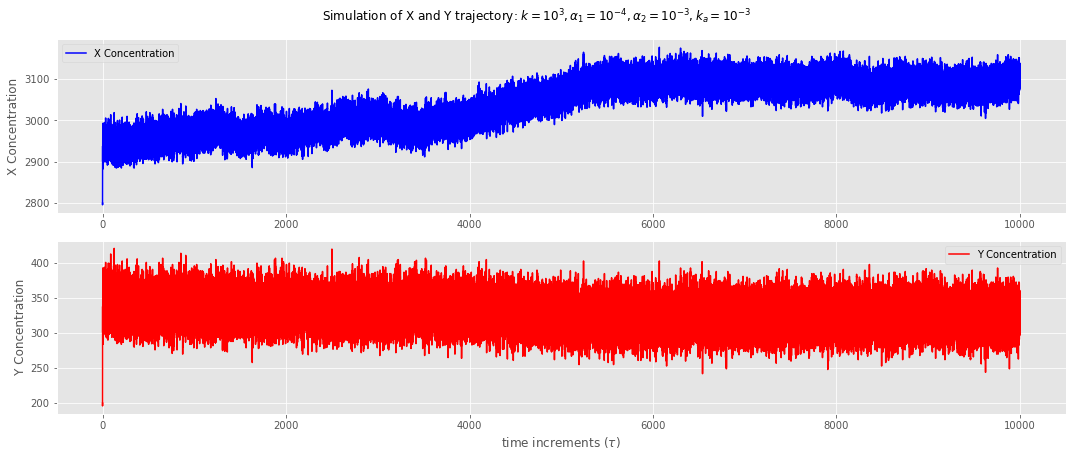

In [18]:
def plots2(X0, Y0, K, a1, a2, ka, n_steps, n_sim):
    
    fig, ax = plt.subplots(2,1, figsize=(15,6))
    
    [X, Y, t, Xmean, Ymean, tmean] = Gillespie_2( X0, Y0, K, a1, a2, ka, n_steps, n_sim)
      
    ax[0].plot(t[0,:], X[0,:], label='1', color='b')
    ax[1].plot(t[0,:], Y[0,:], label='2', color='r')
    ax[0].legend(['X Concentration'])
    ax[1].legend(['Y Concentration'])
    ax[1].set_xlabel(r'time increments ($\tau$)')
    ax[0].set_ylabel('X Concentration')
    ax[1].set_ylabel('Y Concentration')
    plt.suptitle(r'Simulation of X and Y trajectory: $k=10^3,\alpha_1=10^{-4}'\
                 r',\alpha_2=10^{-3},k_a=10^{-3}$', y=1.05)
    plt.tight_layout()


X0, Y0 = 2800, 200
[K, a1, a2, ka] = [10**3,10**-4,10**-3,10**-3]
n_steps = 2*10**7
n_sim = 1
plots2(X0, Y0, K, a1, a2, ka, n_steps, n_sim)

Both cases get closer to the fixed points $X\approx3161.78$ and $Y\approx316.178$ as we increase the number of steps. But In the second sets of plots we can see it goes to stationary much faster than the first case. The reason is that since $k$ has changed from $10$ to $10^3$, so the rate of producing $X$ and $Y$ has increased and hence at a fixed time $t$, the concentration $X(t)$ ( or $Y(t)$ ) in the second case is larger than $X(t)$ ( or $Y(t)$) in the first case ( more likely ).

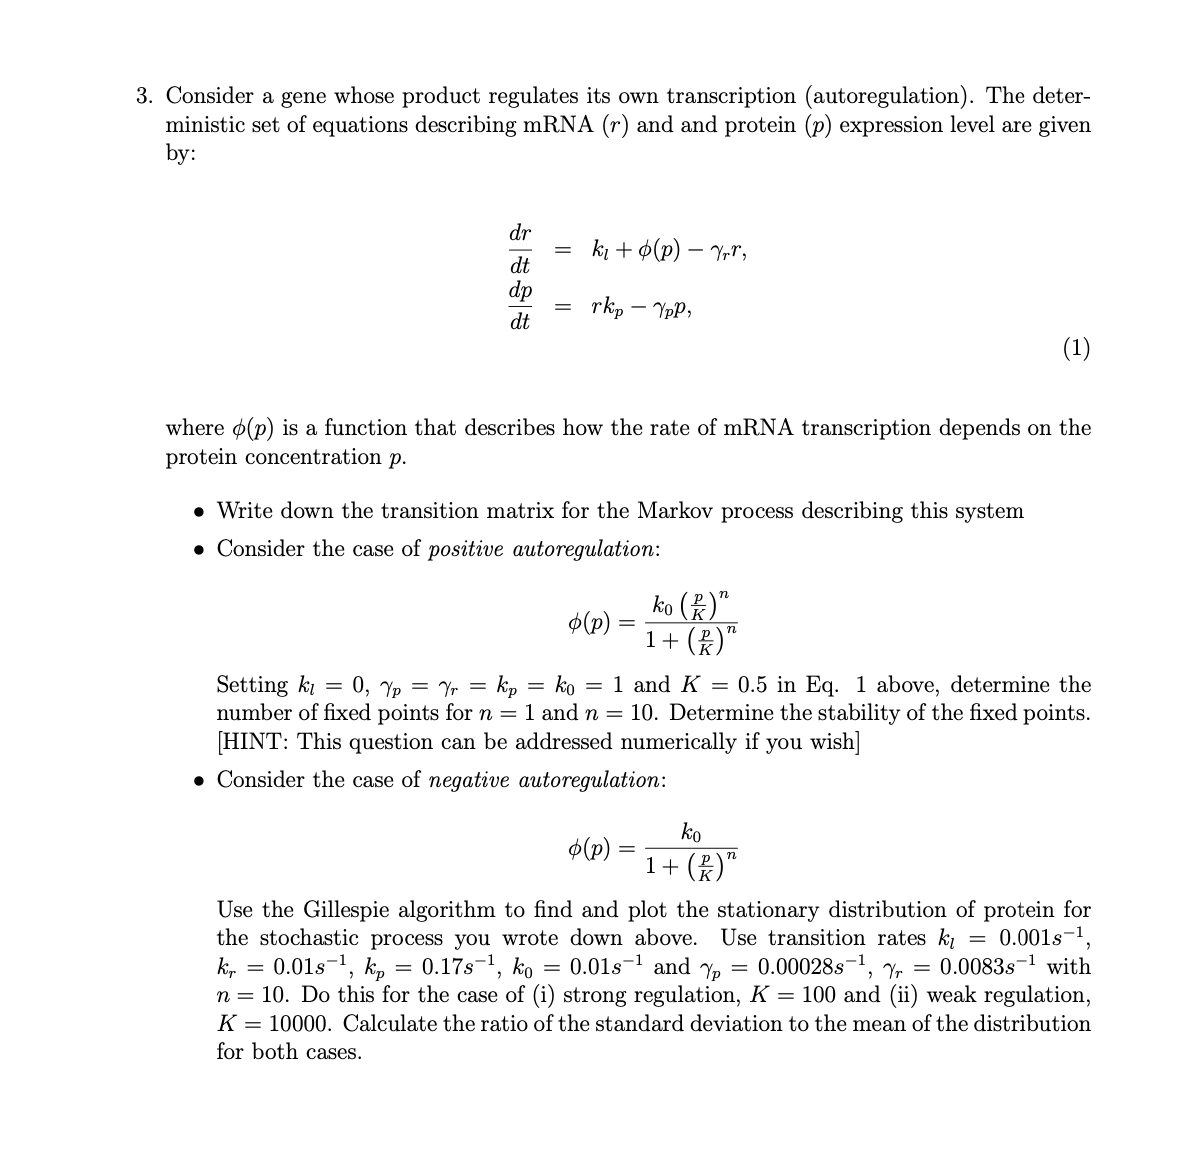

Gillespie algorithm for the last part of question 3:

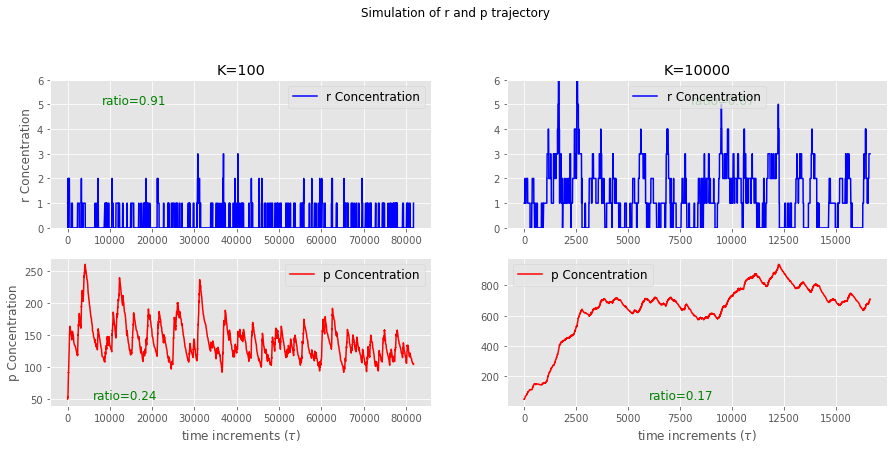

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
plt.style.use('ggplot')


def phi(p, k0, K, n):
    
    return k0/(1+(p/K)**n)


def Gillespie_3(r0, p0, kl, gr, kp, gp, k0, K, n, n_steps, n_sim):
    
    # n_sim = number of simulations
    
    r, p, t = [np.zeros((n_sim, n_steps)) for i in range(3)]
    for i in range(n_sim):
        
        r[i,0], p[i,0] = r0, p0
        
        for k in range(n_steps-1):

            prop = [kl+phi(p[i,k], k0, K, n), gr*r[i,k], kp*r[i,k], gp*p[i,k]]    # propensity functions
            v = [[1,0], [-1,0], [0,1], [0,-1]]    # reaction vectors
            par = [sum(prop[:j]) for j in range(1,5)]    # partial sums of propensities
             
            u1 = np.random.uniform(0,1)
            u2 = np.random.uniform(0,1)

            j = next(i for i, val in enumerate(par) if val > u1*sum(prop)) 
            tau = -np.log(u2)/sum(prop)

            t[i,k+1] = t[i,k] + tau
            r[i,k+1] = r[i,k] + v[j][0]
            p[i,k+1] = p[i,k] + v[j][1]
    
    t_aver = np.mean(t,axis=0)
    r_aver =  np.mean(r,axis=0)    
    p_aver =  np.mean(p,axis=0) 
    r_std = np.std(r,axis=0)
    p_std = np.std(p,axis=0)
        
    return [r, p, t, r_aver, r_std, p_aver, p_std, t_aver]     
        
        
def plots3(r0, p0, kl, gr, kp, gp, k0, K_list, n, n_steps, n_sim):
    
    fig, ax = plt.subplots(2,2, figsize=(15,6))
    r_ratio, p_ratio = {}, {}
    
    for i, K in enumerate(K_list):
    
        [r, p, t, r_aver, r_std, p_aver, p_std, t_aver] = Gillespie_3(r0, p0, kl, gr, kp, gp,
                                                                      k0, K, n, n_steps, n_sim)
        r_ratio[i] = r_std[-1]/r_aver [-1]
        p_ratio[i] = p_std[-1]/p_aver [-1]
        
        ax[0,i].plot(t[0,:], r[0,:], label='1', color='b')
        ax[1,i].plot(t[0,:], p[0,:], label='2', color='r')
        ax[0,i].set_title('K={}'.format(K))
        ax[0,i].legend(['r Concentration'], fontsize=12)
        ax[1,i].legend(['p Concentration'], fontsize=12)
        ax[0,i].text(8000,5,'ratio=%1.2f'%r_ratio[i], color='g',fontsize=12)
        ax[1,i].text(6000,50,'ratio=%1.2f'%p_ratio[i],color='g',fontsize=12)
        ax[1,i].set_xlabel(r'time increments ($\tau$)')
        ax[0,0].set_ylabel('r Concentration')
        ax[1,0].set_ylabel('p Concentration')
        ax[0,i].set_ylim([0,6])
        plt.suptitle(r'Simulation of r and p trajectory', y=1.05)
    


r0, p0 = 1,50
[kl, gr, kp, gp, k0] = [0.001,0.0083,0.17,0.00028,0.01]
K_list=[100,10000]
n = 10
n_steps = 7000
n_sim = 600
plots3(r0, p0, kl, gr, kp, gp, k0, K_list, n, n_steps, n_sim)

I have found the mean and std at a very large time when we reach the staionary point.